# Kickstarter

In [297]:
# Import des libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [298]:
# Lecture des fichiers csv téléchargé depuis webrobots (robot qui scrape kickstarter tous les mois)
#La dernière version contient les données jusqu'au mois d'avril 2022
df = pd.read_csv('Kickstarter.csv')
df.shape
df1 = pd.read_csv('Kickstarter001.csv')
df1.shape
df2 = pd.read_csv('Kickstarter002.csv')
df2.shape
df3 = pd.read_csv('Kickstarter003.csv')
df3.shape
df4 = pd.read_csv('Kickstarter004.csv')
df4.shape
df5 = pd.read_csv('Kickstarter005.csv')
df5.shape
df6 = pd.read_csv('Kickstarter006.csv')
df6.shape
df7 = pd.read_csv('Kickstarter007.csv')
df7.shape
df8 = pd.read_csv('Kickstarter008.csv')
df8.shape

(1646, 35)

In [299]:
# Concatenation de tous les dataframes. 
df_kick = pd.concat([df, df1, df2, df3,df4, df5,df6, df7, df8], axis = 0)
df_kick.shape

(30992, 35)

In [300]:
# Premier audit des NA, il y en a très peu.
df_kick.isna().sum(axis = 0)

backers_count                0
blurb                        3
category                     0
converted_pledged_amount     0
country                      0
country_displayable_name     0
created_at                   0
creator                      0
currency                     0
currency_symbol              0
currency_trailing_code       0
current_currency             0
deadline                     0
disable_communication        0
fx_rate                      0
goal                         0
id                           0
is_starrable                 0
launched_at                  0
location                    47
name                         0
photo                        0
pledged                      0
profile                      0
slug                         0
source_url                   0
spotlight                    0
staff_pick                   0
state                        0
state_changed_at             0
static_usd_rate              0
urls                         0
usd_exch

In [301]:
# Conversion des dates à un format lisible.
df_kick['launched_at'] = pd.to_datetime(df_kick['launched_at'], unit = 's')

In [302]:
#On isole l'année dans une variable 'year' à partir de 'launched_at' 
df_kick['year']= pd.DatetimeIndex(df_kick['launched_at']).year

# Kickstarter_final_version (Filter results by year)

In [303]:
#Nous faisons le choix de ne garder les valeurs qu'à partir de 2018 jusqu'à avril 2022
#Nous avons assez de volume et une diversité des années (pré et post covid)
df_22 = df_kick.loc[df_kick['year']>2017]

In [304]:
#Notre base contient 15723 campagnes et 36 variables
df_22.shape

(15723, 36)

In [305]:
#Voici à quoi ressemble le dataframe
pd.options.display.max_columns = None
df_22.head()

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,currency_trailing_code,current_currency,deadline,disable_communication,fx_rate,goal,id,is_starrable,launched_at,location,name,photo,pledged,profile,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_exchange_rate,usd_pledged,usd_type,year
0,18,A cookbook for lyke minded poeple who love sim...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",5034,US,the United States,1609376406,"{""id"":1076439302,""name"":""Ali"",""slug"":""lykemind...",USD,$,True,USD,1611968831,False,1.000000,5000.0,120103859,False,2021-01-01 23:59:43,"{""id"":23417205,""name"":""Newport Beach"",""slug"":""...",Lyke Minded Cookbook,"{""key"":""assets/031/920/501/1a53ee27a4a0fb1b390...",5034.00,"{""id"":4134642,""project_id"":4134642,""state"":""in...",lyke-minded-cookbook,https://www.kickstarter.com/discover/categorie...,True,False,successful,1611968831,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,5034.000000,international,2021
1,508,A cookbook filled with memoirs and recipes fro...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",48365,HK,Hong Kong,1606278560,"{""id"":974771323,""name"":""Peggy Chan"",""slug"":""ch...",HKD,$,True,USD,1614096106,False,0.127500,350000.0,1023532741,False,2020-12-25 16:01:46,"{""id"":2165352,""name"":""Hong Kong"",""slug"":""hong-...",Provenance 譜珍譜法: Principles of plant-based coo...,"{""key"":""assets/032/094/820/7a1583504407fcfad59...",374995.00,"{""id"":4114692,""project_id"":4114692,""state"":""ac...",provenance-principles-of-plant-based-cookery,https://www.kickstarter.com/discover/categorie...,True,True,successful,1614096106,0.128984,"{""web"":{""project"":""https://www.kickstarter.com...",0.128976,48368.291331,international,2020
2,14,Zine de libro de recetas para estudiantes,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",98,ES,Spain,1606477096,"{""id"":1376613464,""name"":""Asociación Trece Aran...",EUR,€,False,USD,1607900340,False,1.081901,50.0,1376977869,False,2020-11-30 15:47:42,"{""id"":20220580,""name"":""Aranjuez"",""slug"":""aranj...",Trecetario. Recetario para estudiantes.,"{""key"":""assets/031/575/623/b861e6ec7bfd8a28a7c...",81.00,"{""id"":4115923,""project_id"":4115923,""state"":""in...",trecetario-recetario-para-estudiantes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1607900340,1.196375,"{""web"":{""project"":""https://www.kickstarter.com...",1.211149,96.906412,international,2020
3,1486,"A Chef's Guide to Hunting, Preparing and Cooki...","{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",127765,US,the United States,1604500905,"{""id"":365711508,""name"":""Jesse Griffiths"",""slug...",USD,$,True,USD,1610082068,False,1.000000,65000.0,603784370,False,2020-11-24 05:01:08,"{""id"":2357536,""name"":""Austin"",""slug"":""austin-t...",The Hog Book by Jesse Griffiths,"{""key"":""assets/031/597/486/53a02a84990be110e41...",127765.69,"{""id"":4102184,""project_id"":4102184,""state"":""ac...",the-hog-book-by-jesse-griffiths,https://www.kickstarter.com/discover/categorie...,True,True,successful,1610082068,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1.000000,127765.690000,international,2020
4,249,A selection of the recipes we love from the co...,"{""id"":306,""name"":""Cookbooks"",""analytics_name"":...",14574,GB,the United Kingdom,1605454727,"{""id"":349330105,""name"":""Eilis and Emma"",""slug""...",GBP,£,False,USD,1608573895,False,1.304140,10600.0,554428086,False,2020-11-21 18:04:55,"{""id"":17044,""name"":""Coventry"",""slug"":""coventry...",Gloria & Lil's: the recipe book.,"{""key"":""assets/031/422/744/6906d009135426ddd4e...",10907.00,"{""id"":4108693,""project_id"":4108693,""state"":""in...",gloria-and-lils-the-recipe-book,https://www.kickstarter.com/discover/categorie...,True,True,successful,1608573895,1.327616,"{""web"":{""project""

In [306]:
# Notre variable cible sera le succès ou non d'une campagne. Elle est construite avec 4 modalités
df_22['state'].unique()

array(['successful', 'live', 'failed', 'canceled'], dtype=object)

In [307]:
# Nous isolons les catégories dans une variable spécifique à partir de 'catégory', variable dictionnaire
import ast
df_22['category'] =  df_22['category'].map(lambda d : ast.literal_eval(d))
df_22['cat_ana_name']= df_22['category'].apply(lambda x : x['analytics_name'])
df_22['cat_ana_name'].unique()

C:\Users\joffr\AppData\Local\Temp/ipykernel_9908/2412146866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['category'] =  df_22['category'].map(lambda d : ast.literal_eval(d))
C:\Users\joffr\AppData\Local\Temp/ipykernel_9908/2412146866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['cat_ana_name']= df_22['category'].apply(lambda x : x['analytics_name'])


array(['Cookbooks', 'Product Design', 'Design', 'Comedy', 'Print', 'Web',
       'Audio', 'Journalism', 'Video', 'Graphic Design', 'Graphic Novels',
       'Small Batch', 'Food', 'Drinks', 'Farms', 'Restaurants', 'Spaces',
       'Literary Spaces', 'R&B', 'Interactive Design', 'Toys',
       'Webcomics', 'Sound', 'Architecture', 'Civic Design', 'Plays',
       'Literary Journals', 'Typography', 'Punk', 'Fiction',
       'Community Gardens', 'Photo', 'Software', 'Pop', 'Food Trucks',
       'Events', 'Vegan', "Farmer's Markets", 'Rock', 'Poetry',
       'Conceptual Art', 'Letterpress', 'Bacon', 'Documentary'],
      dtype=object)

In [308]:
# Audit du type de nos variables
df_22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15723 entries, 0 to 1633
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   backers_count             15723 non-null  int64         
 1   blurb                     15722 non-null  object        
 2   category                  15723 non-null  object        
 3   converted_pledged_amount  15723 non-null  int64         
 4   country                   15723 non-null  object        
 5   country_displayable_name  15723 non-null  object        
 6   created_at                15723 non-null  int64         
 7   creator                   15723 non-null  object        
 8   currency                  15723 non-null  object        
 9   currency_symbol           15723 non-null  object        
 10  currency_trailing_code    15723 non-null  bool          
 11  current_currency          15723 non-null  object        
 12  deadline           

Après une premier audit de nos données et une mise en forme nous décidons d'effectuer des visualisations pour comprendre nos variables

## Graphique_1: Etat des campagnes Kickstarter

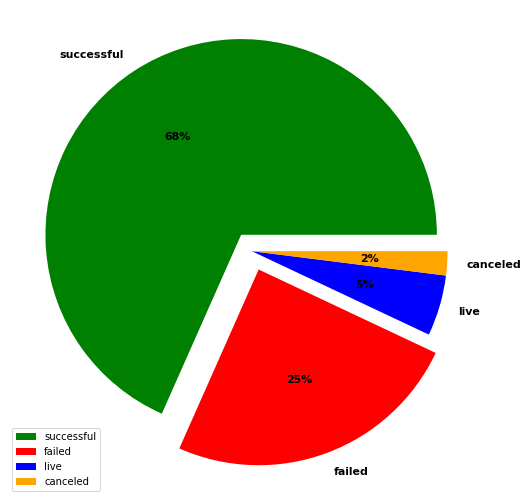

In [309]:

state = df_22['state'].value_counts() #le graphique montre le cumul des campagnes par état

plt.figure(figsize=(9,9)) #je définis la taille de mon graphique
plt.pie(state, labels = state.index, 
        colors = ['green', 'red', 'blue', 'orange'],
        explode = [0.1, 0.1, 0, 0],
       autopct = lambda x: str(round(x)) + '%',
       textprops={'weight':'bold', 'fontsize':11})
plt.legend()
plt.show();

# Le graphique montre qu'une majorité des campagnes sont réussies
# Il y a deux états (live, canceled) qui ne seront pas utiles pour notre analyse mais qui représentent que 7% des campagnes
# Nous pourrons supprimer ces campagnes de notre base

In [310]:
# Nous convertissons notre variable state en plusieurs variables catégorielles
df_22 = pd.concat([df_22, pd.get_dummies(df_22['state'], prefix = 'state')], axis = 1)

## Graphique_2: Etat des campagnes Kickstarter

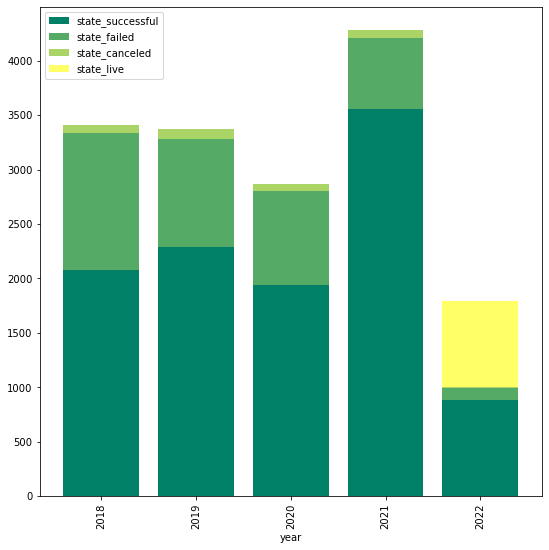

In [311]:

df_state = pd.concat([df_22['year'], df_22['state_successful'], df_22['state_failed'],df_22['state_canceled'], df_22['state_live']], axis = 1)
#je crée un nouveau df pour créer mon graphique

gr2 = plt.subplot(111) #je décide d'utiliser la méthode groupby pour avoir le cumul des états de mes campagnes par années
df_state.groupby('year').sum().plot(kind='bar', stacked = True, figsize = (9,9), width = 0.8, colormap = 'summer', ax=gr2)
plt.title=('Nombre de campagnes par années', {'fontsize':18})
plt.xlabel=('Year', {'fontsize':11})
plt.ylabel=('Nombre de campagnes lancées', {'fontsize':11})
plt.show()

#Nous voyons que le nombre de campagnes est stable jusqu'en 2020, à partir de 2021 celui-ci augmente nettement
#La répartition des campagnes 'success' et 'failed' à aussi l'air stable jusqu'en 2021 (aumgentation des campagnes réussies)
#Il y a peut être eu un effet covid sur ce secteur

# Graphique_3: Distribution des catégories

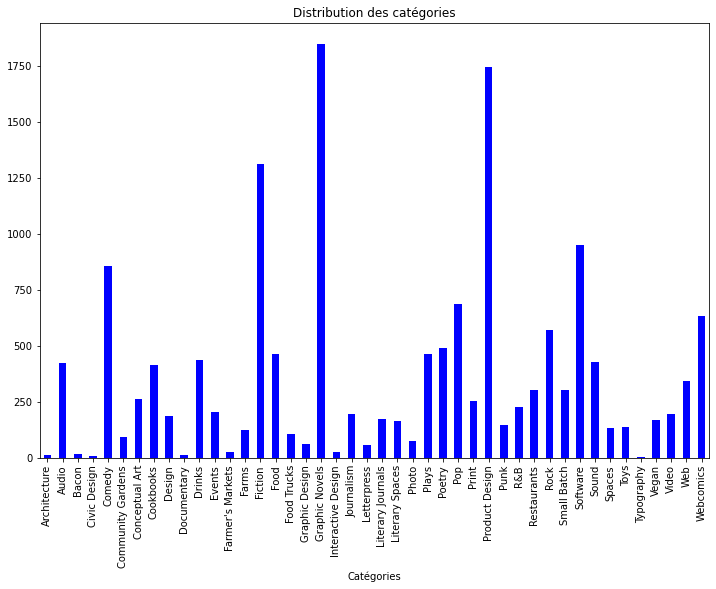

In [312]:
df_22['cat_name'] = df_22['category'].apply(lambda x: x['name'])
df_22.groupby('cat_name').size().plot(kind = 'bar', figsize = (12,8), color = 'b',
            title ='Distribution des catégories', xlabel = 'Catégories');
# Les catégories les plus présentes sont : 'Graphic Novels', 'Product Design'and 'Fiction'.
# Il y a beaucoup de catégories avec peu de campagnes, il faudra faire une regroupement logique pour réduire ce nombre

## Graphique_4: Nombre de campagnes par pays

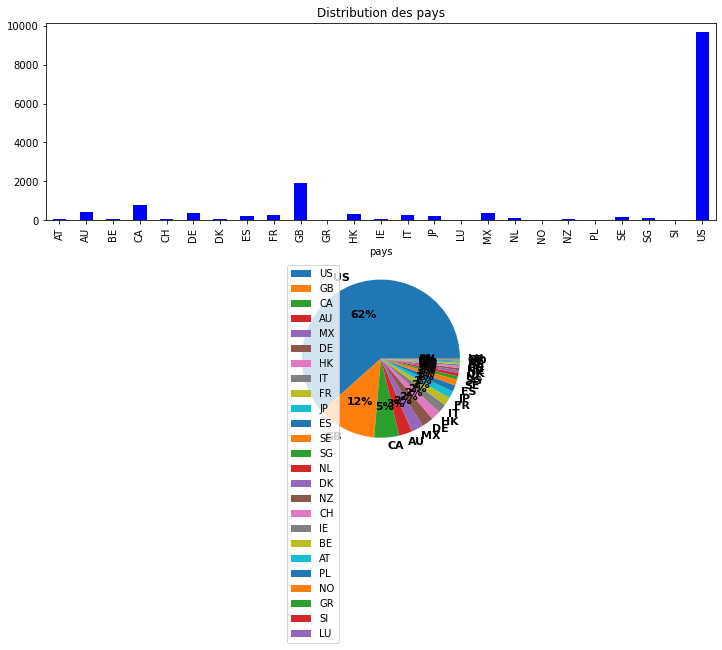

In [313]:
country_ = df_22['country'].value_counts()
#La plupart des campagnes sont lancées depuis les USA, et ensuite vient l'UK. Un regroupement pourrait être fait

fig = plt.figure(figsize=(9,9)) 
plt.subplot(211)
df_22.groupby('country').size().plot(kind = 'bar', figsize = (12,8), color = 'b',
            title ='Distribution des pays', xlabel = 'pays')

plt.subplot(212)
plt.pie(country_, labels = country_.index, 
        autopct = lambda x: str(round(x)) + '%',
       textprops={'weight':'bold', 'fontsize':11})
plt.legend();


state
canceled         966024
failed          4335548
live           14021115
successful    320921461
Name: converted_pledged_amount, dtype: int64


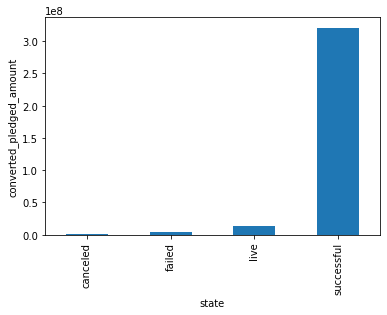

In [314]:
#Etat des sommes récoltées en fonction du succés ou non d'une campagne
#Evidemment les campagnes succès ont récolté beaucoup plus d'argent
df_22.groupby("state")["converted_pledged_amount"].sum().plot(kind='bar', ylabel='converted_pledged_amount')
print(df_22.groupby("state")["converted_pledged_amount"].sum())

# Data Cleaning

In [315]:
# Nous supprimons certaines colonnes redondantes ou inutilisables 
df_22_kick = df_22.drop(['blurb', 'country', 'creator', 'currency', 'currency_symbol', 'currency_trailing_code',
                         'current_currency', 'fx_rate', 'is_starrable', 'location', 'pledged', 'profile', 
                         'slug', 'source_url', 'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'], 
                        axis = 1)
df_22_kick.drop([ 'photo', 'category', 'cat_ana_name'], axis = 1, inplace = True)

#DataFrame que nous utiliserons à présent.
df_22_kick.columns

Index(['backers_count', 'converted_pledged_amount', 'country_displayable_name',
       'created_at', 'deadline', 'disable_communication', 'goal', 'id',
       'launched_at', 'name', 'spotlight', 'staff_pick', 'state',
       'usd_exchange_rate', 'year', 'state_canceled', 'state_failed',
       'state_live', 'state_successful', 'cat_name'],
      dtype='object')

In [316]:
#regroupement des catégories en associant logiquement les catégories qui se ressemblent. Nous passons d'une quarantaine à moins de 20 catégories
df_22_kick['cat_group'] = df_22_kick['cat_name']
df_22_kick['cat_group'] = df_22_kick['cat_group'].replace({'Toys': 'Product Design', 'Small Batch': 'Cookbooks',
                                 'Bacon' : 'Food', 'Vegan': 'Food', 'Drinks':'Food',
                                'Restaurants':'Restauration', 'Food Trucks':'Restauration', 'Spaces':'Restauration', 'Events':'Restauration',
                                'Farms':'Farming', "Farmer's Markets":'Farming', 'Community Gardens':'Farming',
                                'Sound': 'Audio',
                                'Pop': 'Music', 'Punk': 'Music', 'R&B': 'Music', 'Rock': 'Music',
                                'Conceptual Art': 'Art','Architecture': 'Art','Print': 'Art', 'Photo': 'Art',
                                'Graphic Design': 'Design', 'Interactive Design': 'Design', 'Civic Design': 'Design',
                                'Video': 'Film', 'Documentary': 'Film', 'Journalism': 'Film',
                                'Letterpress':'Typography',
                                'Literary Journals': 'Litterature', 'Literary Spaces': 'Litterature', 'Plays': 'Litterature', 'Poetry': 'Litterature'})

df_22_kick['cat_group'].unique()

array(['Cookbooks', 'Product Design', 'Design', 'Comedy', 'Art', 'Web',
       'Audio', 'Film', 'Graphic Novels', 'Food', 'Farming',
       'Restauration', 'Litterature', 'Music', 'Webcomics', 'Typography',
       'Fiction', 'Software'], dtype=object)

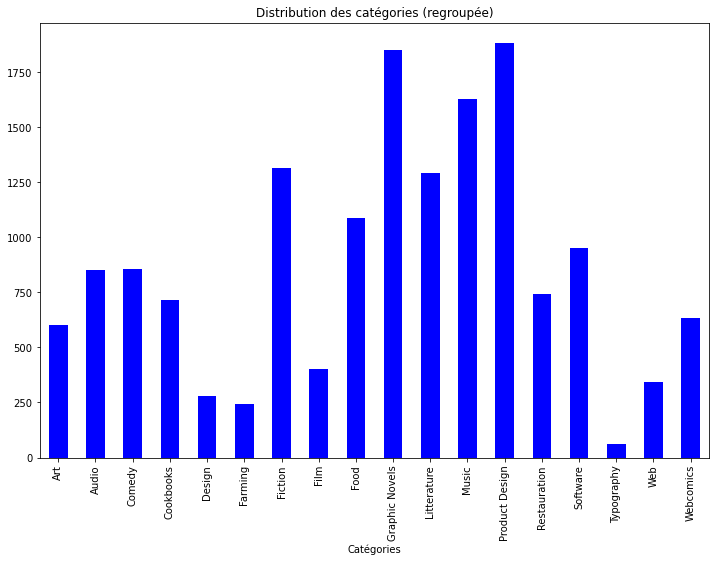

In [317]:
df_22_kick.groupby('cat_group').size().plot(kind = 'bar', figsize = (12,8), color = 'b',
            title ='Distribution des catégories (regroupée)', xlabel = 'Catégories');

In [318]:
# Changement de l'ordre des colonnes pour avoir une meilleure vision
df_22_kick = df_22_kick[["backers_count", "id" , "name","year","cat_name", "cat_group",
                        "converted_pledged_amount",
                        "country_displayable_name", "created_at","launched_at", "deadline", "disable_communication",
                        "goal", "usd_exchange_rate", "spotlight", "staff_pick",
                        "state", "state_canceled", "state_failed", 
                        "state_live", "state_successful"]]


In [319]:
# Convertion des variables 'deadline' and 'launched_at' en format lisible
df_22_kick['deadline'] = pd.to_datetime(df_22_kick['deadline'], unit = 's')
df_22_kick['created_at'] = pd.to_datetime(df_22_kick['created_at'], unit = 's')


In [320]:
df_22_kick.isna().sum()
#vérification du nombre de NA = il n'y en a pas

backers_count               0
id                          0
name                        0
year                        0
cat_name                    0
cat_group                   0
converted_pledged_amount    0
country_displayable_name    0
created_at                  0
launched_at                 0
deadline                    0
disable_communication       0
goal                        0
usd_exchange_rate           0
spotlight                   0
staff_pick                  0
state                       0
state_canceled              0
state_failed                0
state_live                  0
state_successful            0
dtype: int64

In [321]:
#conversion de la colonne goal pour avoir un montant en usd comparables
df_22_kick['converted_goal'] = (df_22_kick['goal']*df_22_kick['usd_exchange_rate']).round()


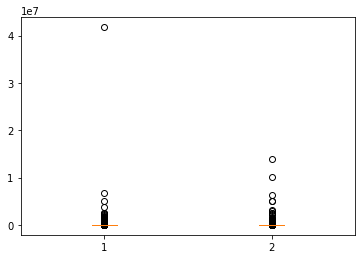

In [322]:
plt.boxplot([df_22_kick.converted_pledged_amount, df_22_kick.converted_goal]);

#analyse de la distribution : il y a des valeurs extrêmes mais qui sont intéressantes car elles correspondent à une réalité

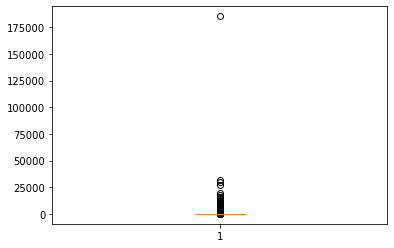

In [323]:
plt.boxplot(df_22_kick.backers_count);
#recode en déciles qui pourrait avoir un sens ?

Une campagne à l'air d'avoir eu un comportement très spécial et a surperformé aussi bien en nombre de backers qu'en montant récolté

In [324]:
#c'est la même variable qui a eu un soutien massif et un montant récolté très haut
df_22_kick.loc[df_22_kick['backers_count']==185341]

,backers_count,id,name,year,cat_name,cat_group,converted_pledged_amount,country_displayable_name,created_at,launched_at,deadline,disable_communication,goal,usd_exchange_rate,spotlight,staff_pick,state,state_canceled,state_failed,state_live,state_successful,converted_goal
1212,185341,1497949659,Surprise! Four Secret Novels by Brandon Sanderson,2022,Fiction,Fiction,41754153,the United States,2022-01-10 20:16:06,2022-03-01 16:00:07,2022-03-31 23:00:00,False,1000000.0,1.0,True,True,successful,0,0,0,1,1000000.0


In [325]:
#transformation de la variable backers_count en 10 catégories correspondants aux déciles
df_22_kick['backers_count_recode'] = pd.qcut(df_22_kick['backers_count'], 10, labels = ['0-2', '2-6', '6-16', '16-30', '30-49', '49-75', '75-118', '118-192', '192, 391', '391-185341'])
#transformation de la variable converted_goal en quintiles
df_22_kick['converted_goal_recode'] = pd.qcut(df_22_kick['converted_goal'], 5, labels = ['1-1000', '1000-3000', '3000-6026', '6026-15_000','15_000-14_000_000'])


In [326]:
#nous cherchons à avoir le mois de la deadline de la campagne pour voir s'il y a une saisonnalité
df_22_kick['deadline_month']= pd.DatetimeIndex(df_22_kick['deadline']).month

In [327]:
#création d'une variable duration qui calcule la durée d'une campagne en jours
df_22_kick['duration']= df_22_kick['deadline']-df_22_kick['launched_at']
df_22_kick['duration']= df_22_kick['duration'].astype('timedelta64[D]')

Durée moyenne d'une campagne :  34.10087133498696  jours


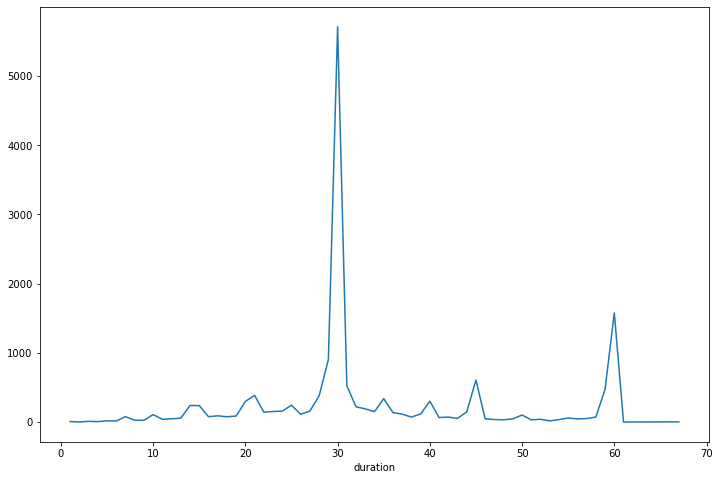

In [328]:
df_22_kick.groupby('duration').size().plot(figsize = (12,8));
print("Durée moyenne d'une campagne : ", df_22_kick['duration'].mean(), " jours")
#Les campagnes sont pour la grande majorité de un mois. C'est la durée de base mise en place par la plateforme

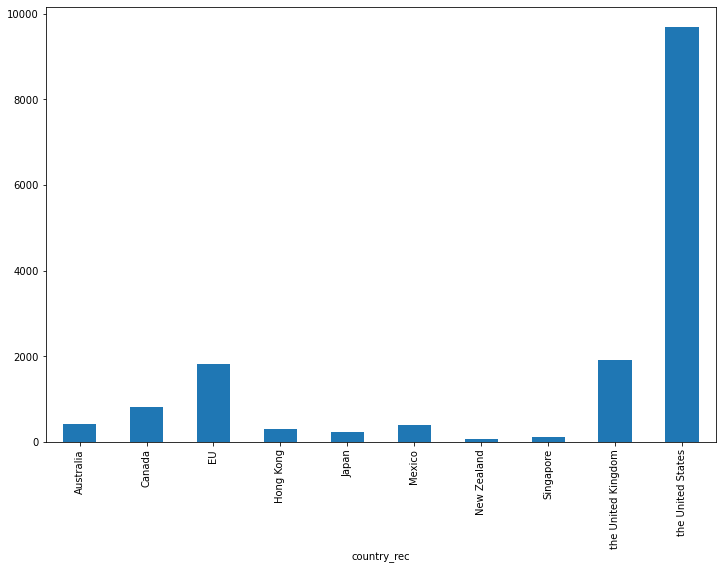

In [329]:
#regroupement des pays européens entre eux pour limiter le nombre de petits pays
df_22_kick['country_rec'] = df_22_kick['country_displayable_name'].replace({'France' : 'EU', 'Austria' : 'EU','Belgium' : 'EU',
                                                                            'Denmark' : 'EU', 'Germany' : 'EU', 'Greece' : 'EU',
                                                                            'Ireland' : 'EU','Italy' : 'EU','Luxembourg' : 'EU',
                                                                            'Norway' : 'EU','Poland' : 'EU','Slovenia' : 'EU',
                                                                            'Spain' : 'EU','Sweden' : 'EU','Switzerland' : 'EU',
                                                                            'the Netherlands' : 'EU'})
df_22_kick.groupby('country_rec').size().plot(kind = 'bar', figsize = (12,8));

Analyse de la saisonnalité : nous cherchons à voir si le mois de l'année influe sur les campagnes

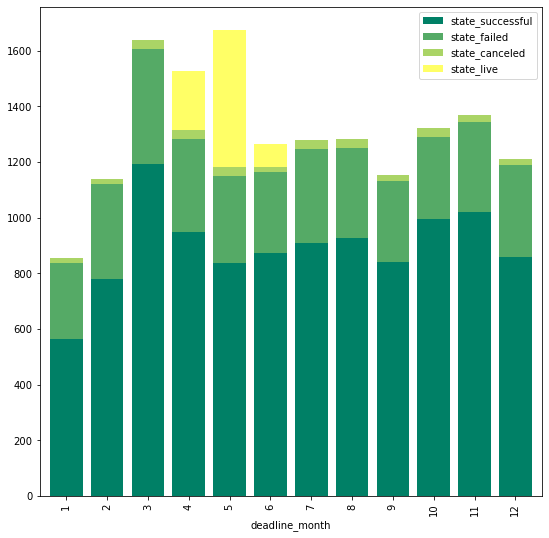

In [330]:
df_state = pd.concat([df_22_kick['deadline_month'], df_22_kick['state_successful'], df_22_kick['state_failed'],df_22_kick['state_canceled'], df_22_kick['state_live']], axis = 1)

gr3 = plt.subplot(111) 
df_state.groupby('deadline_month').sum().plot(kind='bar', stacked = True, figsize = (9,9), width = 0.8, colormap = 'summer', ax=gr3)
plt.title=("Nombre de campagnes par mois de l'année", {'fontsize':18})
plt.xlabel=('Month', {'fontsize':11})
plt.ylabel=('Nombre de campagnes lancées', {'fontsize':11})
plt.show()
# il y a plus de campagnes qui se finissent en mars (donc lancées en février). 
#Le nombre de 'live' en mai s'explique par notre jeu de données qui s'arretait en avril

# Premier modèle testé : Decision Tree Classifier

In [331]:
#Premier test de modèle : Decision Tree
#Nous allons utiliser un maximum de variables explicatives : cat_group, backers_count, country_rec, converted_pledged_amount, converted_goal, duration, year, deadline_month, 'staff_pick'
#Nous aurons besoin de dichotomiser : cat_group, country_rec, year, deadline_month
#Nous aurons besoin de normaliser : backers_count, converted_pedged_amount, converted_goal, duration
#la variable cible est 'state', elle est déjà dichotomisée donc nous allons utiliser la modalité 'successful'


In [332]:
#préparationd des variables 
df_22_kick['staff_pick'].replace({True : 1, False : 0}, inplace=True)

In [333]:
cat_df = pd.DataFrame(pd.get_dummies(df_22_kick['cat_group'], 'cat'))
country_df = pd.DataFrame(pd.get_dummies(df_22_kick['country_rec'], 'country'))
year_df = pd.DataFrame(pd.get_dummies(df_22_kick['year']))
deadline_df = pd.DataFrame(pd.get_dummies(df_22_kick['deadline_month'], 'd_month'))
goal_usd = pd.DataFrame(pd.get_dummies(df_22_kick['converted_goal_recode'], 'goal_usd'))
df_22_kick = pd.concat([df_22_kick, cat_df, country_df, year_df, deadline_df, goal_usd], axis =1)


In [334]:
data = df_22_kick.drop(['year', 'converted_goal_recode', 'goal_usd_1-1000', 'goal_usd_1000-3000', 'goal_usd_3000-6026', 'goal_usd_6026-15_000', 'goal_usd_15_000-14_000_000' , 'cat_group', 'deadline_month', 'country_rec','id', 'name', 'state_successful', 'deadline', 'cat_name', 'country_displayable_name', 'created_at', 'launched_at', 'disable_communication', 'goal', 'usd_exchange_rate', 'spotlight', 'state', 'state_canceled', 'state_failed', 'state_live', 'backers_count_recode'], axis =1)
target = df_22_kick['state_successful']
data.head()

,backers_count,converted_pledged_amount,staff_pick,converted_goal,duration,cat_Art,cat_Audio,cat_Comedy,cat_Cookbooks,cat_Design,cat_Farming,cat_Fiction,cat_Film,cat_Food,cat_Graphic Novels,cat_Litterature,cat_Music,cat_Product Design,cat_Restauration,cat_Software,cat_Typography,cat_Web,cat_Webcomics,country_Australia,country_Canada,country_EU,country_Hong Kong,country_Japan,country_Mexico,country_New Zealand,country_Singapore,country_the United Kingdom,country_the United States,2018,2019,2020,2021,2022,d_month_1,d_month_2,d_month_3,d_month_4,d_month_5,d_month_6,d_month_7,d_month_8,d_month_9,d_month_10,d_month_11,d_month_12
0,18,5034,0,5000.0,28.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,508,48365,1,45142.0,60.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,14,98,0,61.0,13.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1486,127765,1,65000.0,45.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,249,14574,1,14164.0,30.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [335]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

display(pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(dt_clf.score(X_test, y_test))
print(f1_score(y_test, y_pred))

Classe prédite,0,1
Classe réelle,,
0,828,167
1,4,2146


0.9456279809220985
0.9616849652699978


Le score est plutôt bon, ce qui est normal à la vue des variables que nous avons utilisées.


In [336]:
#variables les plus importantes 

feats = {}
for feature, importance in zip(data.columns, dt_clf.feature_importances_):
    feats[feature] = importance 
    
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances.sort_values(by='Importance', ascending=False).head(9)

#le nombre de personnes soutenant la cmampagne est logiquement la variable la plus importante dans la prédiction du succès

,Importance
backers_count,0.653997
converted_goal,0.166288
converted_pledged_amount,0.100900
2022,0.047358
d_month_5,0.031457
2021,0.000000
country_Japan,0.000000
country_Mexico,0.000000
country_New Zealand,0.000000


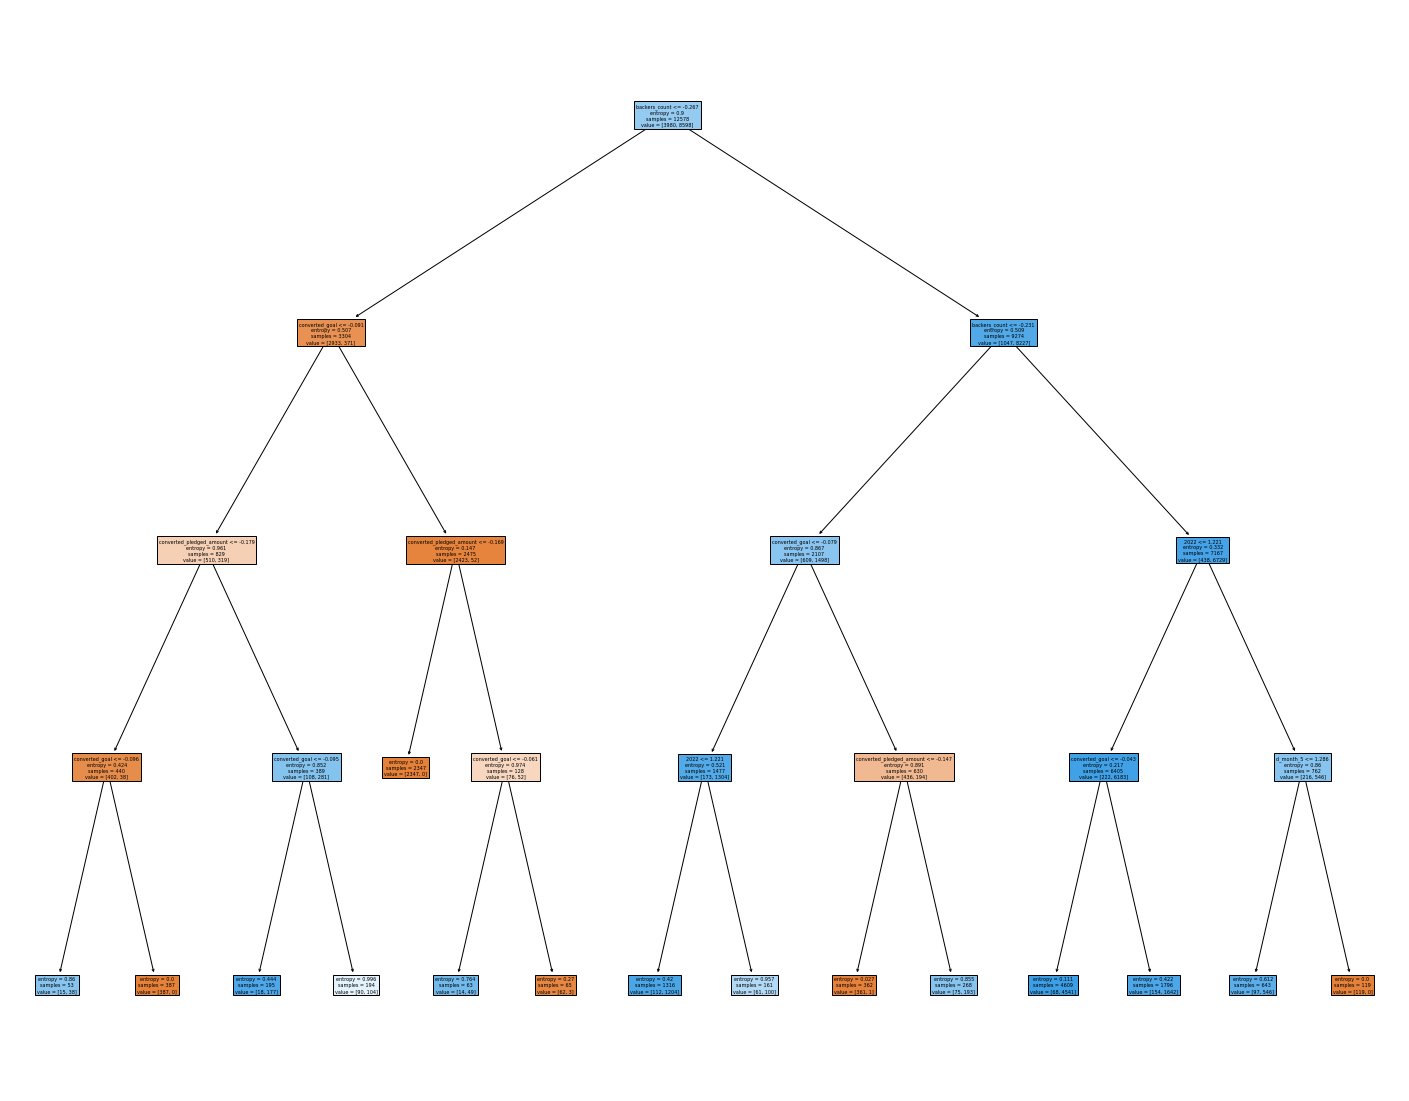

In [337]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_clf, feature_names=data.columns,
                   filled=True)
#Tentative de visualisation du decision tree pour comprendre son fonctionnement

# Problématique : quelle est l'influence de la catégorie de la campagne dans son succès ou non ?

# Analyse des corrélations

<AxesSubplot:>

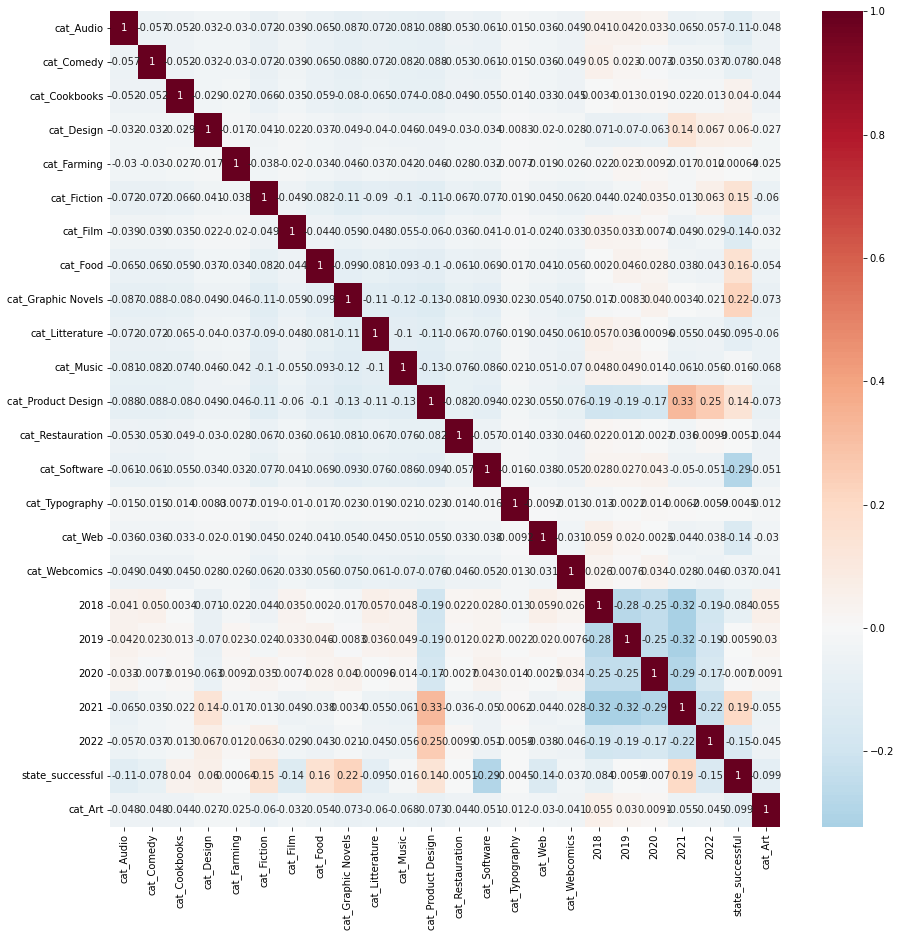

In [338]:
corr_cat = df_22_kick[['cat_Audio',                 'cat_Comedy',
                    'cat_Cookbooks',                 'cat_Design',
                      'cat_Farming',                'cat_Fiction',
                         'cat_Film',                   'cat_Food',
               'cat_Graphic Novels',            'cat_Litterature',
                        'cat_Music',         'cat_Product Design',
                 'cat_Restauration',               'cat_Software',
                   'cat_Typography',                    'cat_Web',
                    'cat_Webcomics',                         2018,
                               2019,                         2020,
                               2021,                         2022,
                       'state_successful', 'cat_Art']].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_cat, annot = True, cmap='RdBu_r', center =0)


Product Design est corrélé à l'année 2021 alors que les Graphic Novels ont l'air d'être corrélés au succès

<AxesSubplot:>

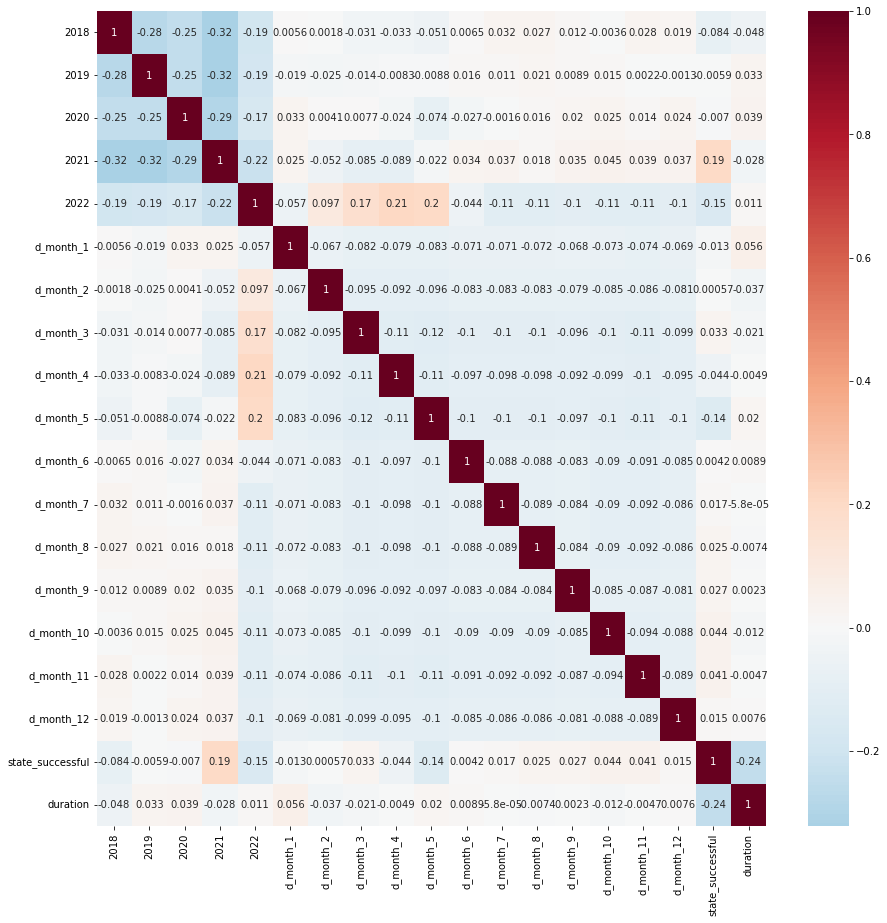

In [339]:
corr_saison = df_22_kick[[  2018,                         2019,
                               2020,                         2021, 2022,                  'd_month_1',
                        'd_month_2',                  'd_month_3',
                        'd_month_4',                  'd_month_5',
                        'd_month_6',                  'd_month_7',
                        'd_month_8',                  'd_month_9',
                       'd_month_10',                 'd_month_11',
                       'd_month_12', 'state_successful',  'duration', 'converted_goal_recode']].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_saison, annot = True, cmap='RdBu_r', center =0)


Il n'y a rien qui se détache de ce tableau de corrélation

<AxesSubplot:>

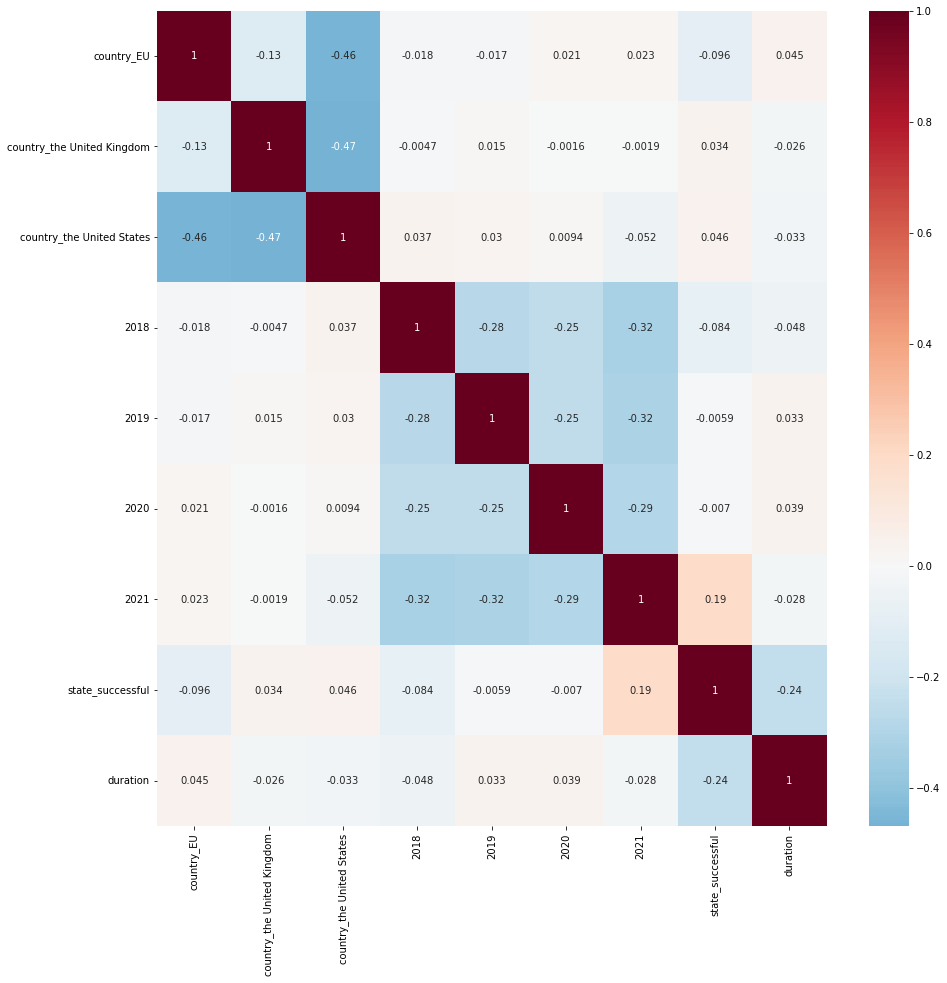

In [340]:
corr_country = df_22_kick[[          'country_EU',     
                    
            
       'country_the United Kingdom',  'country_the United States',
                               2018,                         2019,
                               2020,                         2021,
                           'state_successful',  'duration']].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_country, annot = True, cmap='RdBu_r', center =0)

Il n'y a rien qui se détache de ce tableau de corrélation

<AxesSubplot:>

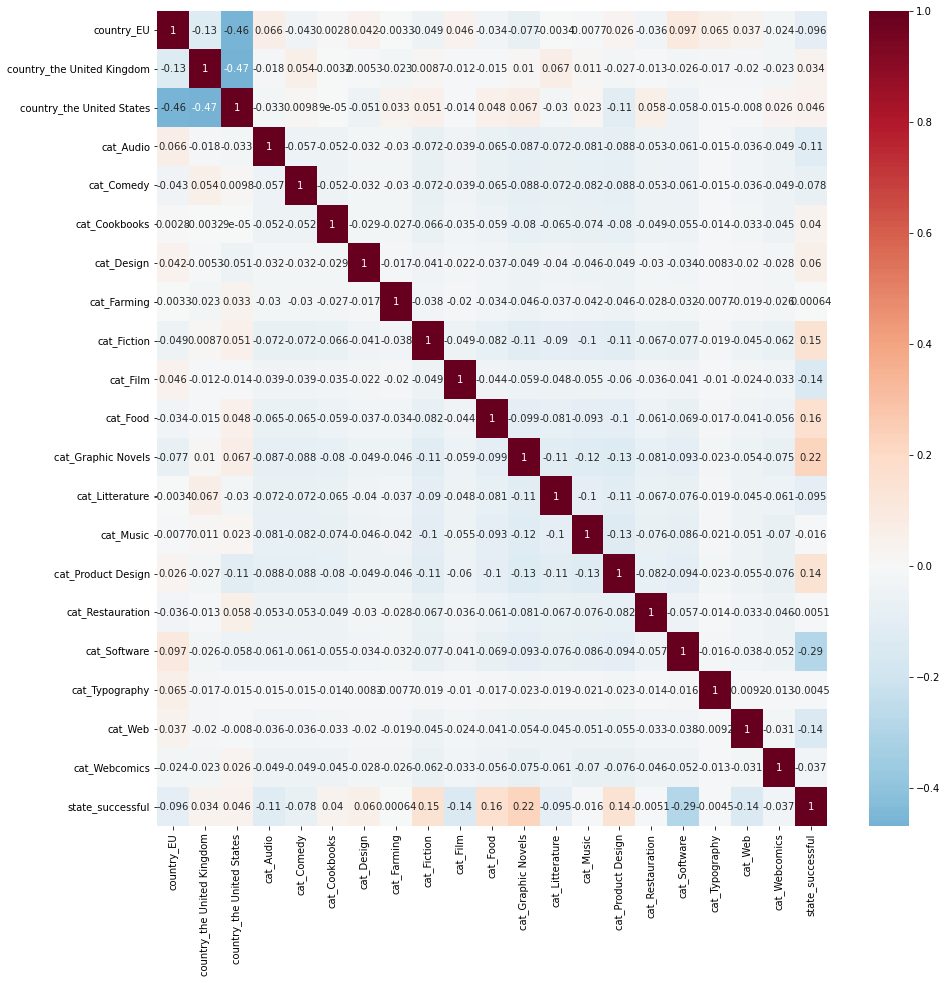

In [341]:
corr_country_cat = df_22_kick[[
                       'country_EU',       
                           
                   
       'country_the United Kingdom',  'country_the United States', 'cat_Audio',                 'cat_Comedy',
                    'cat_Cookbooks',                 'cat_Design',
                      'cat_Farming',                'cat_Fiction',
                         'cat_Film',                   'cat_Food',
               'cat_Graphic Novels',            'cat_Litterature',
                        'cat_Music',         'cat_Product Design',
                 'cat_Restauration',               'cat_Software',
                   'cat_Typography',                    'cat_Web',
                    'cat_Webcomics',     
                           'state_successful']].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_country_cat, annot = True, cmap='RdBu_r', center =0)

Tentative en regardant les pays et les catégories mais rien ne se détache

Conclusion : Les corrélations sont légères et en dehors de l'année 2021 et de quelques catégories aucune variable n'est corrélée au succès de la campagne

# Test des modèles

Analyse via Decision Tree avec uniquement les variables connues à priori

In [342]:
#Data finales=> uniquement les variables : duration, deadline(month), year, country, category(recode), goal(usd)
data3 = df_22_kick.drop(['duration','country_displayable_name', 'converted_goal_recode', 'converted_goal' ,'staff_pick','converted_pledged_amount', 'backers_count',  'year', 'cat_group', 'deadline_month', 'country_rec','id', 'name', 'state_successful', 'deadline', 'cat_name', 'created_at', 'launched_at', 'disable_communication', 'goal', 'usd_exchange_rate', 'spotlight', 'state', 'state_canceled', 'state_failed', 'state_live', 'backers_count_recode'], axis =1)
target = df_22_kick['state_successful']
data3.columns

Index([                   'cat_Art',                  'cat_Audio',
                       'cat_Comedy',              'cat_Cookbooks',
                       'cat_Design',                'cat_Farming',
                      'cat_Fiction',                   'cat_Film',
                         'cat_Food',         'cat_Graphic Novels',
                  'cat_Litterature',                  'cat_Music',
               'cat_Product Design',           'cat_Restauration',
                     'cat_Software',             'cat_Typography',
                          'cat_Web',              'cat_Webcomics',
                'country_Australia',             'country_Canada',
                       'country_EU',          'country_Hong Kong',
                    'country_Japan',             'country_Mexico',
              'country_New Zealand',          'country_Singapore',
       'country_the United Kingdom',  'country_the United States',
                               2018,                         2

In [343]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(data3, target, test_size=0.2)
sc = StandardScaler()
X_train3 = sc.fit_transform(X_train3)
X_test3 = sc.transform(X_test3)
dt_clf3 = DecisionTreeClassifier()

dt_clf3.fit(X_train3, y_train3)
y_pred3 = dt_clf3.predict(X_test3)

display(pd.crosstab(y_test3, y_pred3, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(f1_score(y_test3, y_pred3))

Classe prédite,0,1
Classe réelle,,
0,687,291
1,387,1780


0.8400188768286928


In [344]:
#variables les plus importantes 

featsDT = {}
for feature, importance in zip(data3.columns, dt_clf3.feature_importances_):
    featsDT[feature] = importance 
    
importancesDT = pd.DataFrame.from_dict(featsDT, orient='index').rename(columns={0: 'Importance'})
importancesDT = importancesDT.sort_values(by='Importance', ascending=False).head(25)
importancesDT

,Importance
cat_Software,0.108897
2022,0.067538
2021,0.053796
cat_Graphic Novels,0.049642
cat_Food,0.045977
cat_Fiction,0.043019
d_month_5,0.040371
country_the United States,0.026808
cat_Product Design,0.025118
goal_usd_15_000-14_000_000,0.024484


Régression logistique

In [345]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import classification_report


clf = linear_model.LogisticRegression()
clf.fit(X_train3, y_train3)

y_pred_clf = clf.predict(X_test3)

display(pd.crosstab(y_test3, y_pred_clf, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test3, y_pred_clf))


Classe prédite,0,1
Classe réelle,,
0,559,419
1,262,1905


              precision    recall  f1-score   support

           0       0.68      0.57      0.62       978
           1       0.82      0.88      0.85      2167

    accuracy                           0.78      3145
   macro avg       0.75      0.73      0.73      3145
weighted avg       0.78      0.78      0.78      3145



Random Forest

In [346]:
from sklearn import ensemble

RF_clf = ensemble.RandomForestClassifier()
RF_clf.fit(X_train3, y_train3)

y_pred_RF = RF_clf.predict(X_test3)

display(pd.crosstab(y_test3, y_pred_RF, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test3, y_pred_RF))

Classe prédite,0,1
Classe réelle,,
0,636,342
1,300,1867


              precision    recall  f1-score   support

           0       0.68      0.65      0.66       978
           1       0.85      0.86      0.85      2167

    accuracy                           0.80      3145
   macro avg       0.76      0.76      0.76      3145
weighted avg       0.79      0.80      0.79      3145



In [347]:
#variables les plus importantes - RF

featsRF = {}
for feature, importance in zip(data3.columns, RF_clf.feature_importances_):
    featsRF[feature] = importance 
    
importancesRF = pd.DataFrame.from_dict(featsRF, orient='index').rename(columns={0: 'Importance'})
importancesRF = importancesRF.sort_values(by='Importance', ascending=False).head(25)
importancesRF

,Importance
cat_Software,0.078076
cat_Graphic Novels,0.051681
d_month_5,0.043017
2021,0.040149
2022,0.039849
cat_Food,0.033976
goal_usd_15_000-14_000_000,0.030237
d_month_3,0.028868
cat_Fiction,0.028218
country_the United States,0.025822


Support Vector Machine

In [348]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(X_train3, y_train3)

y_pred_svm = svm_clf.predict(X_test3)
display(pd.crosstab(y_test3, y_pred_svm, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test3, y_pred_svm))

Classe prédite,0,1
Classe réelle,,
0,595,383
1,214,1953


              precision    recall  f1-score   support

           0       0.74      0.61      0.67       978
           1       0.84      0.90      0.87      2167

    accuracy                           0.81      3145
   macro avg       0.79      0.75      0.77      3145
weighted avg       0.80      0.81      0.80      3145



KNN

In [349]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn.fit(X_train3, y_train3)

y_pred_knn = knn.predict(X_test3)
display(pd.crosstab(y_test3, y_pred_knn, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test3, y_pred_knn))

Classe prédite,0,1
Classe réelle,,
0,594,384
1,285,1882


              precision    recall  f1-score   support

           0       0.68      0.61      0.64       978
           1       0.83      0.87      0.85      2167

    accuracy                           0.79      3145
   macro avg       0.75      0.74      0.74      3145
weighted avg       0.78      0.79      0.78      3145



In [350]:
#Comparaison des différents modèles testés en regardant le F1 Score

models = pd.DataFrame({'Modeles' : ['Decision Tree', 'Regression logistique', 'Random Forest', 'SVM', 'KNN'],
                      'F1_Score' : [f1_score(y_test3, y_pred3),
                                           f1_score(y_test3, y_pred_clf),
                                 f1_score(y_test3, y_pred_RF),
                                 f1_score(y_test3, y_pred_svm),
                                 f1_score(y_test3, y_pred_knn)]})

models.sort_values(by='F1_Score', ascending = False)

,Modeles,F1_Score
3,SVM,0.867422
2,Random Forest,0.853291
4,KNN,0.849086
1,Regression logistique,0.848363
0,Decision Tree,0.840019


Peu de différence entre les modèles. Nous faisons le choix des meilleurs paramètres pour le modèle SVM qui est le plus performant

#Nous avons fait un gridsearch pour optimiser le modèle. Nous le laissons en markdown pour ne pas le refaire tourner quand nous relançons les kernels

from sklearn.model_selection import GridSearchCV

param_grid_svc = [{'kernel': ['rbf'], 'C': [0.1 , 1 , 10 , 50], 'gamma': [0.001, 0.1]},
                  {'kernel': ['linear'], 'C': [0.1 , 1 , 10 , 50]},
                 {'kernel': ['poly'], 'C': [0.1 , 1 , 10 , 50], 'gamma': [0.001, 0.1]}]

grid_search_svc = GridSearchCV(svm_clf, param_grid_svc, verbose = 2)
grid_search_svc.fit(X_train3, y_train3)
print(grid_search_svc.score(X_train3, y_train3))
print("Meilleurs parametres: ", grid_search_svc.best_params_)
print("Meilleure config: ", grid_search_svc.best_estimator_)


In [351]:
#Meilleurs parametres:  {'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}
svm2_clf = svm.SVC(C= 50, gamma= 0.001, kernel= 'rbf')
svm2_clf.fit(X_train3, y_train3)

y_pred_svm2 = svm2_clf.predict(X_test3)
display(pd.crosstab(y_test3, y_pred_svm2, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test3, y_pred_svm2))
print(f1_score(y_test3, y_pred_svm2))
# Il y a peu de gain grâce aux paramètres

Classe prédite,0,1
Classe réelle,,
0,602,376
1,224,1943


              precision    recall  f1-score   support

           0       0.73      0.62      0.67       978
           1       0.84      0.90      0.87      2167

    accuracy                           0.81      3145
   macro avg       0.78      0.76      0.77      3145
weighted avg       0.80      0.81      0.80      3145

0.8662505572893446


In [352]:
#on regarde quelles variables sont les  plus importantes pour les random forest et decision tree
dt = importancesDT.index
rf = importancesRF.index

print('variables importantes communes :', set(dt) & set(rf)) # quelles variables sont communes aux deux classifieurs

#Certaines catégories sortent du lot, ce qui nous pousse à creuser cette dimension

variables importantes communes : {'d_month_5', 'd_month_4', 'cat_Graphic Novels', 'goal_usd_3000-6026', 'goal_usd_1-1000', 'cat_Fiction', 'cat_Product Design', 'country_the United Kingdom', 'goal_usd_6026-15_000', 'd_month_6', 'country_the United States', 'cat_Food', 'cat_Software', 'goal_usd_15_000-14_000_000', 'goal_usd_1000-3000', 2018, 'cat_Web', 2019, 2021, 2022, 2020, 'd_month_3'}


Analyse de texte sur la variable 'name' qui correspond au titre de la campagne telle que diffusée sur Kickstarter

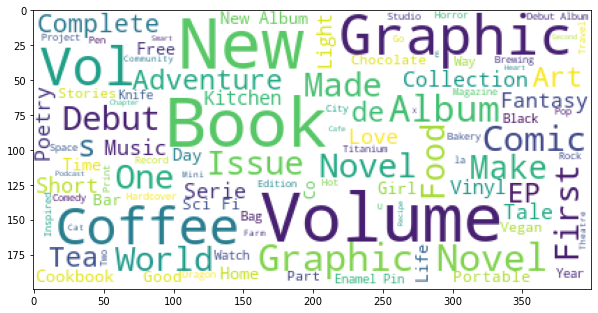

In [353]:
df_text_success = df_22_kick[df_22_kick['state_successful']==1]
# on crée un df avec uniquement les campagnes réussies

text_success = ""
for comment in df_text_success.name : 
    text_success += comment


from wordcloud import WordCloud


wc = WordCloud(background_color="white", max_words=100, max_font_size=50, random_state=42)
plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text_success)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

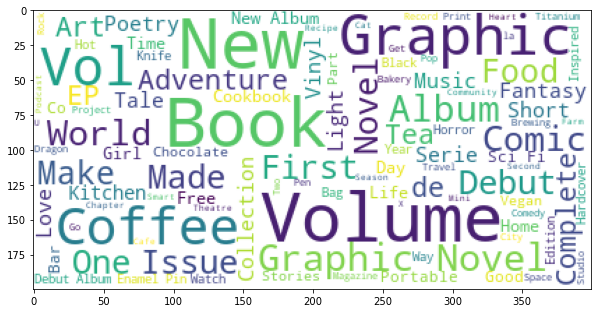

In [354]:
# avec les stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

wc = WordCloud(background_color="white", max_words=100, stopwords=stop_words, max_font_size=50, random_state=42)
plt.figure(figsize= (10,6)) # Initialisation d'une figure
wc.generate(text_success)           # "Calcul" du wordcloud
plt.imshow(wc) # Affichage
plt.show()

Le registre du livre mais aussi de la nouveauté ressortent

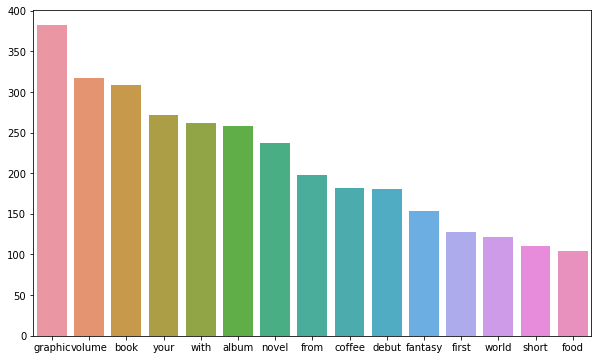

In [355]:
from nltk.tokenize.regexp import RegexpTokenizer

# Initialiser un tokenisteur 
tokenizer = RegexpTokenizer("[a-zA-Zé]{4,}")

# Calculer les tokens
text_success = tokenizer.tokenize(text_success.lower())

from collections import Counter

chaine = ' '.join(i.lower() for i in text_success)
dico = Counter(chaine.split())
mots = [m[0] for m in dico.most_common(15)]
freq = [m[1] for m in dico.most_common(15)]

plt.figure(figsize= (10,6))
sns.barplot(x=mots, y=freq);


Construction d'un graphique pour compter les occurences des mots


Création des 11 top n_words pour les inclure dans le dataframe et aider à la création d'un modèle de prédiction de catégories

In [356]:
#Nous mettons tous les titres en minuscule
df_22_kick['name'] = df_22_kick['name'].str.lower()

In [357]:
df_22_kick.loc[df_22_kick['name'].str.contains('graphic'), 'is_graphic'] = 1
df_22_kick['is_graphic'].fillna(0, inplace =True)
df_22_kick['is_graphic'] = df_22_kick['is_graphic'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('volume'), 'is_volume'] = 1
df_22_kick['is_volume'].fillna(0, inplace =True)
df_22_kick['is_volume'] = df_22_kick['is_volume'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('book'), 'is_book'] = 1
df_22_kick['is_book'].fillna(0, inplace =True)
df_22_kick['is_book'] = df_22_kick['is_book'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('album'), 'is_album'] = 1
df_22_kick['is_album'].fillna(0, inplace =True)
df_22_kick['is_album'] = df_22_kick['is_album'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('coffee'), 'is_coffee'] = 1
df_22_kick['is_coffee'].fillna(0, inplace =True)
df_22_kick['is_coffee'] = df_22_kick['is_coffee'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('debut'), 'is_debut'] = 1
df_22_kick['is_debut'].fillna(0, inplace =True)
df_22_kick['is_debut'] = df_22_kick['is_debut'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('fantasy'), 'is_fantasy'] = 1
df_22_kick['is_fantasy'].fillna(0, inplace =True)
df_22_kick['is_fantasy'] = df_22_kick['is_fantasy'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('first'), 'is_first'] = 1
df_22_kick['is_first'].fillna(0, inplace =True)
df_22_kick['is_first'] = df_22_kick['is_first'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('world'), 'is_world'] = 1
df_22_kick['is_world'].fillna(0, inplace =True)
df_22_kick['is_world'] = df_22_kick['is_world'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('short'), 'is_short'] = 1
df_22_kick['is_short'].fillna(0, inplace =True)
df_22_kick['is_short'] = df_22_kick['is_short'].astype(int)

df_22_kick.loc[df_22_kick['name'].str.contains('food'), 'is_food'] = 1
df_22_kick['is_food'].fillna(0, inplace =True)
df_22_kick['is_food'] = df_22_kick['is_food'].astype(int)



Test de prédiction de la catégorie via les variables que nous avons

In [358]:

data_cat = df_22_kick.loc[:,['duration', 
                             'goal_usd_1-1000', 'goal_usd_1000-3000','goal_usd_3000-6026','goal_usd_6026-15_000','goal_usd_15_000-14_000_000',
                             'country_EU', 'country_Canada', 'country_Hong Kong', 'country_Japan', 'country_Mexico', 'country_New Zealand', 'country_Singapore', 'country_Australia', 'country_the United Kingdom', 'country_the United States',  
                             'staff_pick','converted_pledged_amount', 'backers_count',  'year', 'deadline_month', 'spotlight', 
                             'state_successful', 'state_canceled', 'state_failed', 'state_live', 
                             'is_food', 'is_coffee', 'is_volume', 'is_album', 'is_debut', 'is_first', 'is_short', 'is_graphic', 'is_book', 'is_fantasy', 'is_world']]
target_cat = df_22_kick['cat_group']
data_cat.columns

Index(['duration', 'goal_usd_1-1000', 'goal_usd_1000-3000',
       'goal_usd_3000-6026', 'goal_usd_6026-15_000',
       'goal_usd_15_000-14_000_000', 'country_EU', 'country_Canada',
       'country_Hong Kong', 'country_Japan', 'country_Mexico',
       'country_New Zealand', 'country_Singapore', 'country_Australia',
       'country_the United Kingdom', 'country_the United States', 'staff_pick',
       'converted_pledged_amount', 'backers_count', 'year', 'deadline_month',
       'spotlight', 'state_successful', 'state_canceled', 'state_failed',
       'state_live', 'is_food', 'is_coffee', 'is_volume', 'is_album',
       'is_debut', 'is_first', 'is_short', 'is_graphic', 'is_book',
       'is_fantasy', 'is_world'],
      dtype='object')

In [359]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(data_cat, target_cat, test_size=0.2)
sc = StandardScaler()
X_train_cat = sc.fit_transform(X_train_cat)
X_test_cat = sc.transform(X_test_cat)
dt_cat = DecisionTreeClassifier()

dt_cat.fit(X_train_cat, y_train_cat)
y_pred_cat = dt_cat.predict(X_test_cat)

display(pd.crosstab(y_test_cat, y_pred_cat, rownames=['Classe réelle'], colnames=['Classe prédite']))
print(classification_report(y_test_cat, y_pred_cat))



Classe prédite,Art,Audio,Comedy,Cookbooks,Design,Farming,Fiction,Film,Food,Graphic Novels,Litterature,Music,Product Design,Restauration,Software,Typography,Web,Webcomics
Classe réelle,,,,,,,,,,,,,,,,,,
Art,28,5,12,6,0,2,7,9,4,9,9,10,3,6,8,1,3,9
Audio,6,96,8,6,0,2,3,3,11,2,11,8,14,8,12,0,3,2
Comedy,11,11,28,2,1,2,8,7,8,2,26,22,6,8,17,0,2,4
Cookbooks,10,9,5,57,1,3,10,1,20,10,15,6,4,5,7,1,1,1
Design,3,0,0,2,8,1,1,0,3,4,2,0,31,3,0,1,0,2
Farming,2,3,3,6,2,6,8,0,3,1,2,1,3,1,1,0,0,2
Fiction,5,5,7,10,3,1,62,1,17,40,21,20,14,10,2,0,2,9
Film,5,4,4,2,0,0,1,29,4,1,5,7,0,3,11,0,3,3
Food,5,13,11,13,1,4,18,2,54,18,7,23,14,23,5,0,4,4


                precision    recall  f1-score   support

           Art       0.20      0.21      0.21       131
         Audio       0.42      0.49      0.46       195
        Comedy       0.15      0.17      0.16       165
     Cookbooks       0.36      0.34      0.35       166
        Design       0.15      0.13      0.14        61
       Farming       0.13      0.14      0.13        44
       Fiction       0.28      0.27      0.27       229
          Film       0.30      0.35      0.32        82
          Food       0.26      0.25      0.25       219
Graphic Novels       0.46      0.48      0.47       333
   Litterature       0.20      0.17      0.18       294
         Music       0.42      0.44      0.43       322
Product Design       0.61      0.61      0.61       358
  Restauration       0.18      0.18      0.18       141
      Software       0.30      0.30      0.30       192
    Typography       0.00      0.00      0.00        10
           Web       0.03      0.03      0.03  

Nous avons une matrice importante avec des scores plutôt bons sur certaines catégories comme le Product Design ou Graphic Novel ou Audio

In [363]:
#variables les plus importantes

feats_cat = {}
for feature, importance in zip(data_cat.columns, dt_cat.feature_importances_):
    feats_cat[feature] = importance 
    
importances_cat = pd.DataFrame.from_dict(feats_cat, orient='index').rename(columns={0: 'Importance'})
importances_cat = importances_cat.sort_values(by='Importance', ascending=False).head(25)
importances_cat

#L'ampleur de la campagne mais aussi les top n_words permettent de trouver la catégorie d'une campagne

,Importance
converted_pledged_amount,0.224727
backers_count,0.165737
deadline_month,0.122204
duration,0.122194
year,0.072145
is_album,0.033324
staff_pick,0.022997
country_the United States,0.022983
is_graphic,0.017920
spotlight,0.017183
